<a href="https://colab.research.google.com/github/emanemad-111/CNN/blob/main/cnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [ ]:
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchinfo import summary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from torch.utils.data import DataLoader, random_split
from torchvision import models
import pathlib
from sklearn.model_selection import train_test_split

## Load the data and review classes

In [ ]:
data_train = Path(r"D:\codes\Python\data\Egyption_money\dataset\train")
data_test = Path(r"D:\codes\Python\data\Egyption_money\dataset\test")
data_val = Path(r"D:\codes\Python\data\Egyption_money\dataset\valid")

dirs = os.listdir(data_train)
classes = {k: v for k,v in zip(dirs, range(len(dirs)))}
classes

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\codes\\Python\\data\\Egyption_money\\dataset\\train'

## Display images for each class

Found 2637 files belonging to 9 classes.


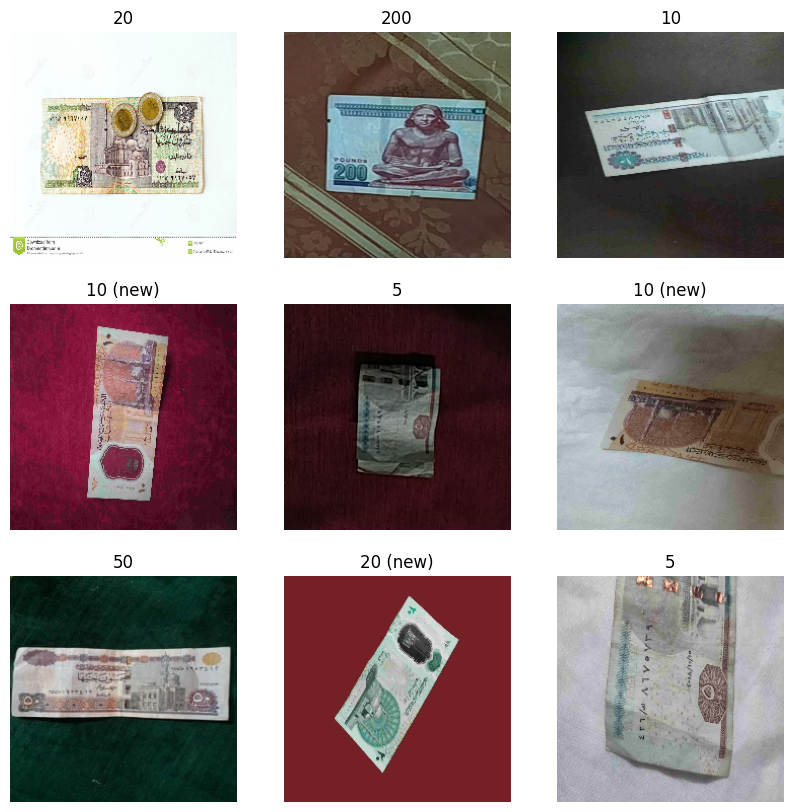

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(r"D:\codes\Python\data\Egyption_money\dataset\train",
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

## how the number of files in each class for all datasets

In [ ]:
print("Training")
for class_name in classes:
  class_dir = os.path.join(data_train, class_name)
  num_files = len(os.listdir(class_dir))
  print(f"Class: {class_name}, Number of files: {num_files}")
print()
print("Testing")
for class_name in classes:
  class_dir = os.path.join(data_test, class_name)
  num_files = len(os.listdir(class_dir))
  print(f"Class: {class_name}, Number of files: {num_files}")
print("Validation")
for class_name in classes:
  class_dir = os.path.join(data_val, class_name)
  num_files = len(os.listdir(class_dir))
  print(f"Class: {class_name}, Number of files: {num_files}")

Training
Class: 1, Number of files: 60
Class: 10, Number of files: 315
Class: 10 (new), Number of files: 317
Class: 100, Number of files: 315
Class: 20, Number of files: 322
Class: 20 (new), Number of files: 346
Class: 200, Number of files: 313
Class: 5, Number of files: 334
Class: 50, Number of files: 315

Testing
Class: 1, Number of files: 20
Class: 10, Number of files: 35
Class: 10 (new), Number of files: 30
Class: 100, Number of files: 35
Class: 20, Number of files: 35
Class: 20 (new), Number of files: 30
Class: 200, Number of files: 35
Class: 5, Number of files: 35
Class: 50, Number of files: 35
Validation
Class: 1, Number of files: 20
Class: 10, Number of files: 80
Class: 10 (new), Number of files: 130
Class: 100, Number of files: 80
Class: 20, Number of files: 80
Class: 20 (new), Number of files: 130
Class: 200, Number of files: 80
Class: 5, Number of files: 80
Class: 50, Number of files: 80


## Visualizing the count distribution of images across different categories and datasets. the data is imbalance

Training Total: 2637, Classes: ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50'], Counts: [60, 315, 317, 315, 322, 346, 313, 334, 315]
Testing Total: 290, Classes: ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50'], Counts: [20, 35, 30, 35, 35, 30, 35, 35, 35]
Validation Total: 759, Classes: ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50'], Counts: [20, 80, 130, 80, 80, 130, 79, 80, 80]


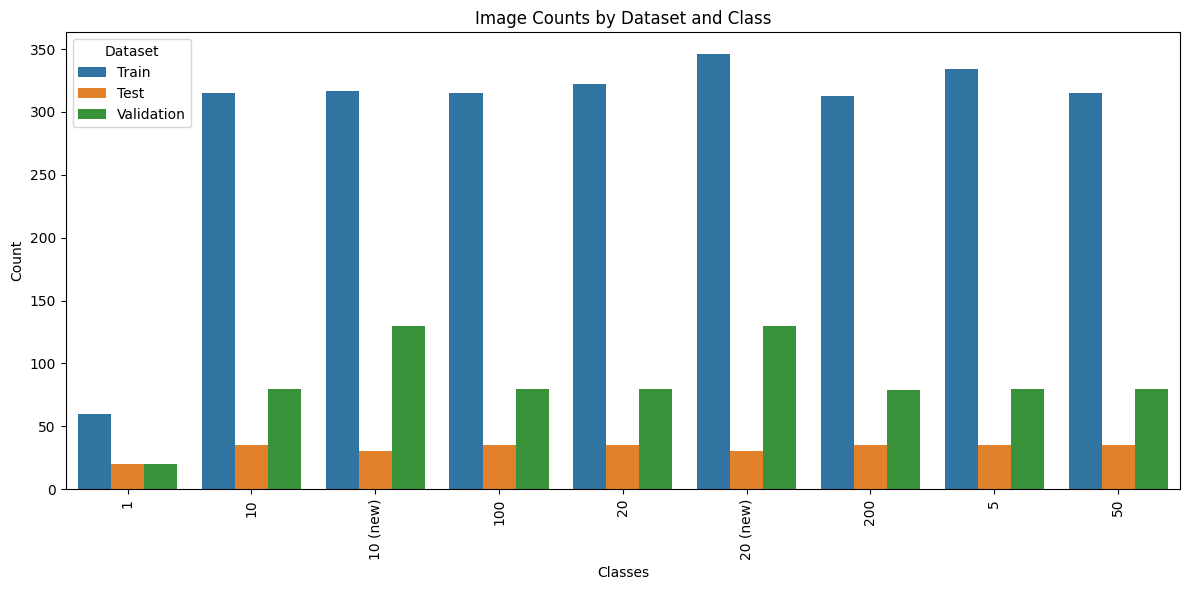

In [ ]:
# Function to count the num of images
def count_images(data_dir):

# Check if the given directory exists
    if not data_dir.exists():
        print(f"Warning: Directory {data_dir} does not exist!")
        return 0, [], []

# Get the class names
    class_names = os.listdir(data_dir)
    num_classes = len(class_names)
    all_count = []  # List count of images per class
    class_name = [] # List the class names
    total = 0

# Iterate through each class
    for class_name in class_names:
        count = len(list(data_dir.glob(f'{class_name}/*.jpg')))
        total += count
        all_count.append(count)

    return total, class_names, all_count

# Count images for training, testing and validation
train_total, train_classes, train_counts = count_images(data_train)
test_total, test_classes, test_counts = count_images(data_test)
val_total, val_classes, val_counts = count_images(data_val)


# Print details to check.
print(f"Training Total: {train_total}, Classes: {train_classes}, Counts: {train_counts}")
print(f"Testing Total: {test_total}, Classes: {test_classes}, Counts: {test_counts}")
print(f"Validation Total: {val_total}, Classes: {val_classes}, Counts: {val_counts}")

# Prepare data
datasets = ['Train'] * len(train_classes) + ['Test'] * len(test_classes) + ['Validation'] * len(val_classes)
classes = train_classes + test_classes + val_classes
counts = train_counts + test_counts + val_counts

# Create a DataFrame
data = pd.DataFrame({'Dataset': datasets, 'Class': classes, 'Count': counts})

# Plot the image counts
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Class', y='Count', hue='Dataset')
plt.title('Image Counts by Dataset and Class')
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

In [ ]:
pip install Augmentor

## convert the imbalance data to balance data by Augmentor

In [ ]:
import Augmentor
import os

# Original data path
data_train = r"D:\codes\Python\data\Egyption_money\dataset\train"

# New data path after balancing
output_base_path = r"D:\codes\Python\data\Egyption_money\dataset\balance"

# List of classes names
class_names = os.listdir(data_train)

# Apply Augmentor for each class
for class_name in class_names:
    class_path = os.path.join(data_train, class_name)
    output_directory = os.path.join(output_base_path, class_name)

# Check if the class directory exists
    if not os.path.exists(class_path):
        print(f"الفئة {class_name} لا توجد في المسار {class_path}")
        continue

    # # Create output folder
    os.makedirs(output_directory, exist_ok=True)

    # apply Augmentor
    print(f"Augmentor applied to category: {class_name}")
    p = Augmentor.Pipeline(class_path, output_directory=output_directory)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.sample(500)  # Generate 500 new images for each class

Augmentor applied to category: 1
Initialised with 60 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\1.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=201x100 at 0x14DC7826C70>: 100%|█| 500/500 [00:03<00:


Augmentor applied to category: 10
Initialised with 315 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\10.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x14DC8899DC0>: 100%|█| 500/500 [00:25<00:00, 19.54 Samples


Augmentor applied to category: 10 (new)
Initialised with 317 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\10 (new).

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x14DC88A1430>: 100%|█| 500/500 [00:39<00:00, 12.72 Samples


Augmentor applied to category: 100
Initialised with 315 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\100.

Processing <PIL.Image.Image image mode=RGB size=240x320 at 0x14DB34A14F0>: 100%|█| 500/500 [00:22<00:00, 22.57 Samples/


Augmentor applied to category: 20
Initialised with 322 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\20.

Processing <PIL.Image.Image image mode=RGB size=240x320 at 0x14DC7802D60>: 100%|█| 500/500 [00:26<00:00, 19.15 Samples/


Augmentor applied to category: 20 (new)
Initialised with 346 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\20 (new).

Processing <PIL.Image.Image image mode=RGB size=4000x3000 at 0x14DC88850D0>: 100%|█| 500/500 [01:01<00:00,  8.12 Sample


Augmentor applied to category: 200
Initialised with 313 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\200.

Processing <PIL.Image.Image image mode=RGB size=320x240 at 0x14DC77F4B20>: 100%|█| 500/500 [00:14<00:00, 35.64 Samples/


Augmentor applied to category: 5
Initialised with 334 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\5.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x14DC3210700>: 100%|█| 500/500 [00:17<00:00, 28.64 Samples


Augmentor applied to category: 50
Initialised with 315 image(s) found.
Output directory set to D:\codes\Python\data\Egyption_money\dataset\balance\50.

Processing <PIL.Image.Image image mode=RGB size=1500x835 at 0x14DC77B63A0>: 100%|█| 500/500 [00:19<00:00, 25.35 Samples


## Visualize the new balance data and count it

Total image count = 4500 

-------------------------------------
Class name = 1
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 10
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 10 (new)
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 100
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 20
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 20 (new)
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 200
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 5
Count      = 500
Proportion = 0.1111
-------------------------------------
Class name = 50
Count      = 500
Proportion = 0.1111
-------------------------------------


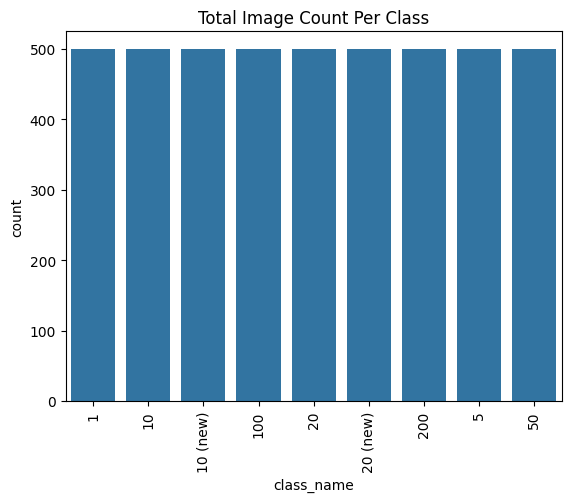

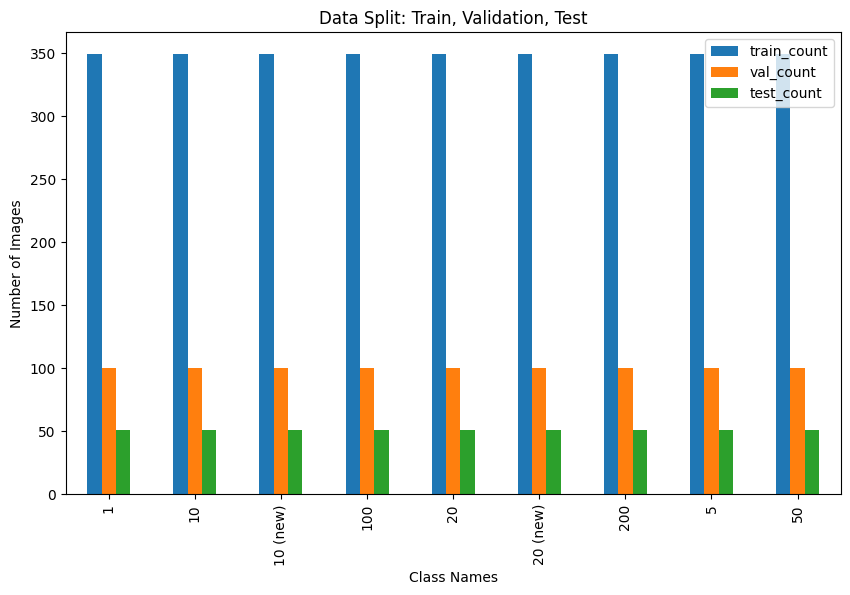

In [ ]:
# Path to the balance dataset
output_dir = pathlib.Path(r"D:\codes\Python\data\Egyption_money\dataset\balance")

# List of class names
class_names = os.listdir(output_dir)

num_classes = len(class_names)
total = 0
all_count = []
class_name = []

# Count the number of images in each class
for i in range(num_classes):
    count = len(list(output_dir.glob(f"{class_names[i]}/*.jpg")))  # استخدام pathlib.Path
    total += count

print(f"Total image count = {total} \n")
print("-------------------------------------")

# Display proportions for each class
for i in range(num_classes):
    count = len(list(output_dir.glob(f"{class_names[i]}/*.jpg")))
    print(f"Class name = {class_names[i]}")
    print(f"Count      = {count}")
    print(f"Proportion = {count / total:.4f}")
    print("-------------------------------------")
    all_count.append(count)
    class_name.append(class_names[i])

# Create DataFrame and analyze data
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns=['count', 'class_name'])

# Split data into train, validation, and test sets
train_size = 0.7  # 70%
val_size = 0.2   # 20%
test_size = 0.1  # 10%

# Split data for each class
train_count = []
val_count = []
test_count = []

for i in range(num_classes):
    # تقسيم البيانات العشوائي
    class_path = output_dir / class_names[i]
    images = list(class_path.glob("*.jpg"))
    train_images, temp_images = train_test_split(images, test_size=(val_size + test_size), random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=(test_size / (val_size + test_size)), random_state=42)

    # حفظ الأعداد
    train_count.append(len(train_images))
    val_count.append(len(val_images))
    test_count.append(len(test_images))

# Create DataFrame to show results of the split
split_df = pd.DataFrame({
    'class_name': class_names,
    'train_count': train_count,
    'val_count': val_count,
    'test_count': test_count
})

merged_df = pd.merge(temp_df, split_df, on='class_name')

# Visualize the total image count per class
sns.barplot(data=merged_df, y="count", x="class_name")
plt.title("Total Image Count Per Class")
plt.xticks(rotation=90)
plt.show()

# Visualize the data
merged_df.set_index('class_name')[['train_count', 'val_count', 'test_count']].plot(kind='bar', figsize=(10, 6))
plt.title("Data Split: Train, Validation, Test")
plt.ylabel("Number of Images")
plt.xlabel("Class Names")
plt.xticks(rotation=90)
plt.show()



## Data Augmentation

In [ ]:
img_transforms  = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomVerticalFlip(p=0.25),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[-0.0932, -0.0971, -0.1260], std=[0.5091, 0.4912, 0.4931])
])

In [ ]:
# Load the data
data_dir = r"D:\codes\Python\data\Egyption_money\dataset\balance"  # Adjust based on dataset structure

dataset = datasets.ImageFolder(data_dir, transform=img_transforms)

# Split dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size =int(0.2 * len(dataset))
test_size = int(0.1 * len(dataset))
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

                              # create data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
validation_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

len(train_dataloader), len(validation_dataloader), len(test_dataloader)

(99, 29, 15)

In [ ]:
# setting up torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

device(type='cpu')

## create model

In [ ]:
# Initialize ResNet50
resnet_model = models.resnet50(pretrained=True)

# Freeze the parameters of the model so that they won't be updated during training
for param in resnet_model.parameters():
    param.requires_grad = False

# Modify the last fully connected layer to match the number of classes
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, len(class_names))  # Set the number of output classes

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.fc.parameters(), lr=0.001)
epochs = 30

C:\Users\amrkh\anaconda3\envs\cuda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\amrkh\anaconda3\envs\cuda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Variables to track the best model
best_model_wts = deepcopy(resnet_model.state_dict())
best_val_acc = 0.0  # Initialize best_val_acc to 0.0

ep_train_loss = []
ep_train_acc = []
ep_val_loss = []
ep_val_acc = []

# Early stopping variables
patience = 5
trigger_times = 0

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2, factor=0.5)

# Training Loop with Validation (No Testing)
for epoch in range(epochs):
    # ======= Training Phase =======
    resnet_model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_dataloader)
    epoch_train_acc = correct / total * 100
    ep_train_loss.append(epoch_train_loss)
    ep_train_acc.append(epoch_train_acc)

    # ======= Validation Phase =======
    resnet_model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # No gradient calculation during evaluation
        for inputs, labels in validation_dataloader:  # Use validation_dataloader for validation
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = resnet_model(inputs)
            loss = criterion(outputs, labels)

            # Update validation loss and accuracy
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    epoch_val_loss = val_loss / len(validation_dataloader)
    epoch_val_acc = val_correct / val_total * 100
    ep_val_loss.append(epoch_val_loss)
    ep_val_acc.append(epoch_val_acc)

    # Check for best model based on validation accuracy
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        best_model_wts = deepcopy(resnet_model.state_dict())  # Save the best model weights
        trigger_times = 0  # Reset patience counter
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            break

    # Step the scheduler
    scheduler.step(epoch_val_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_acc:.2f}%, "
          f"Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_acc:.2f}%")

# Load the best model weights
resnet_model.load_state_dict(best_model_wts)

print(f"Best Validation Accuracy: {best_val_acc:.2f}%")

Epoch [1/30], Train Loss: 0.9454, Train Accuracy: 71.65%, Validation Loss: 0.7512, Validation Accuracy: 80.67%
Epoch [2/30], Train Loss: 0.7359, Train Accuracy: 78.25%, Validation Loss: 0.6713, Validation Accuracy: 80.67%
Epoch [3/30], Train Loss: 0.6317, Train Accuracy: 82.19%, Validation Loss: 0.5620, Validation Accuracy: 83.89%
Epoch [4/30], Train Loss: 0.5520, Train Accuracy: 83.81%, Validation Loss: 0.5004, Validation Accuracy: 85.00%
Epoch [5/30], Train Loss: 0.5065, Train Accuracy: 85.27%, Validation Loss: 0.4985, Validation Accuracy: 83.11%
Epoch [6/30], Train Loss: 0.4533, Train Accuracy: 87.17%, Validation Loss: 0.4443, Validation Accuracy: 86.56%
Epoch [7/30], Train Loss: 0.4500, Train Accuracy: 86.60%, Validation Loss: 0.4589, Validation Accuracy: 86.44%
Epoch [8/30], Train Loss: 0.4230, Train Accuracy: 87.02%, Validation Loss: 0.4074, Validation Accuracy: 87.56%
Epoch [9/30], Train Loss: 0.4062, Train Accuracy: 88.16%, Validation Loss: 0.4601, Validation Accuracy: 85.56%
E

## visualizing Accuracy and Loss

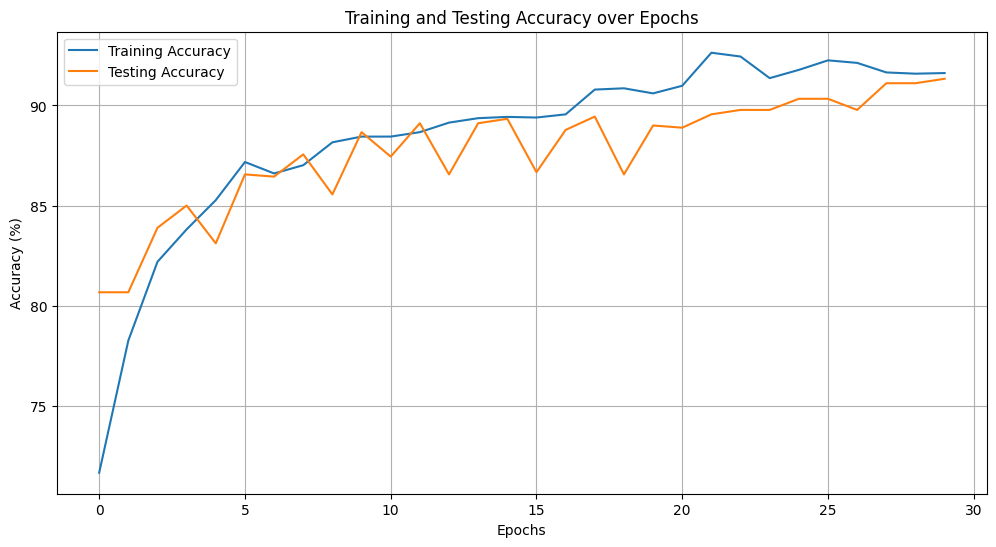

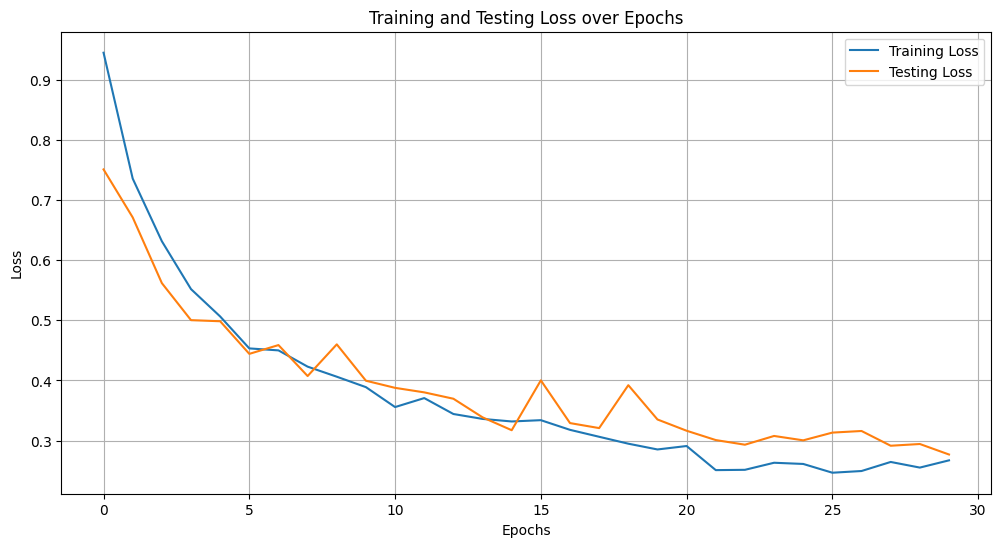

In [ ]:
# accuracy
plt.figure(figsize=(12, 6))
plt.plot(ep_train_acc, label="Training Accuracy")
plt.plot(ep_val_acc, label="Testing Accuracy")
plt.title("Training and Testing Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

#  Loss
plt.figure(figsize=(12, 6))
plt.plot(ep_train_loss, label="Training Loss")
plt.plot(ep_val_loss, label="Testing Loss")
plt.title("Training and Testing Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Model Evaluation

Model Accuracy: 91.78%
Model Precision: 92.59%
Model Recall: 91.78%
Model F1 Score: 91.70%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.95      0.93      0.94        59
           2       0.94      0.94      0.94        50
           3       0.98      0.95      0.96        43
           4       0.75      0.93      0.83        42
           5       1.00      0.94      0.97        52
           6       0.94      0.96      0.95        46
           7       0.95      0.66      0.78        53
           8       0.80      0.96      0.87        49

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.93      0.92      0.92       450



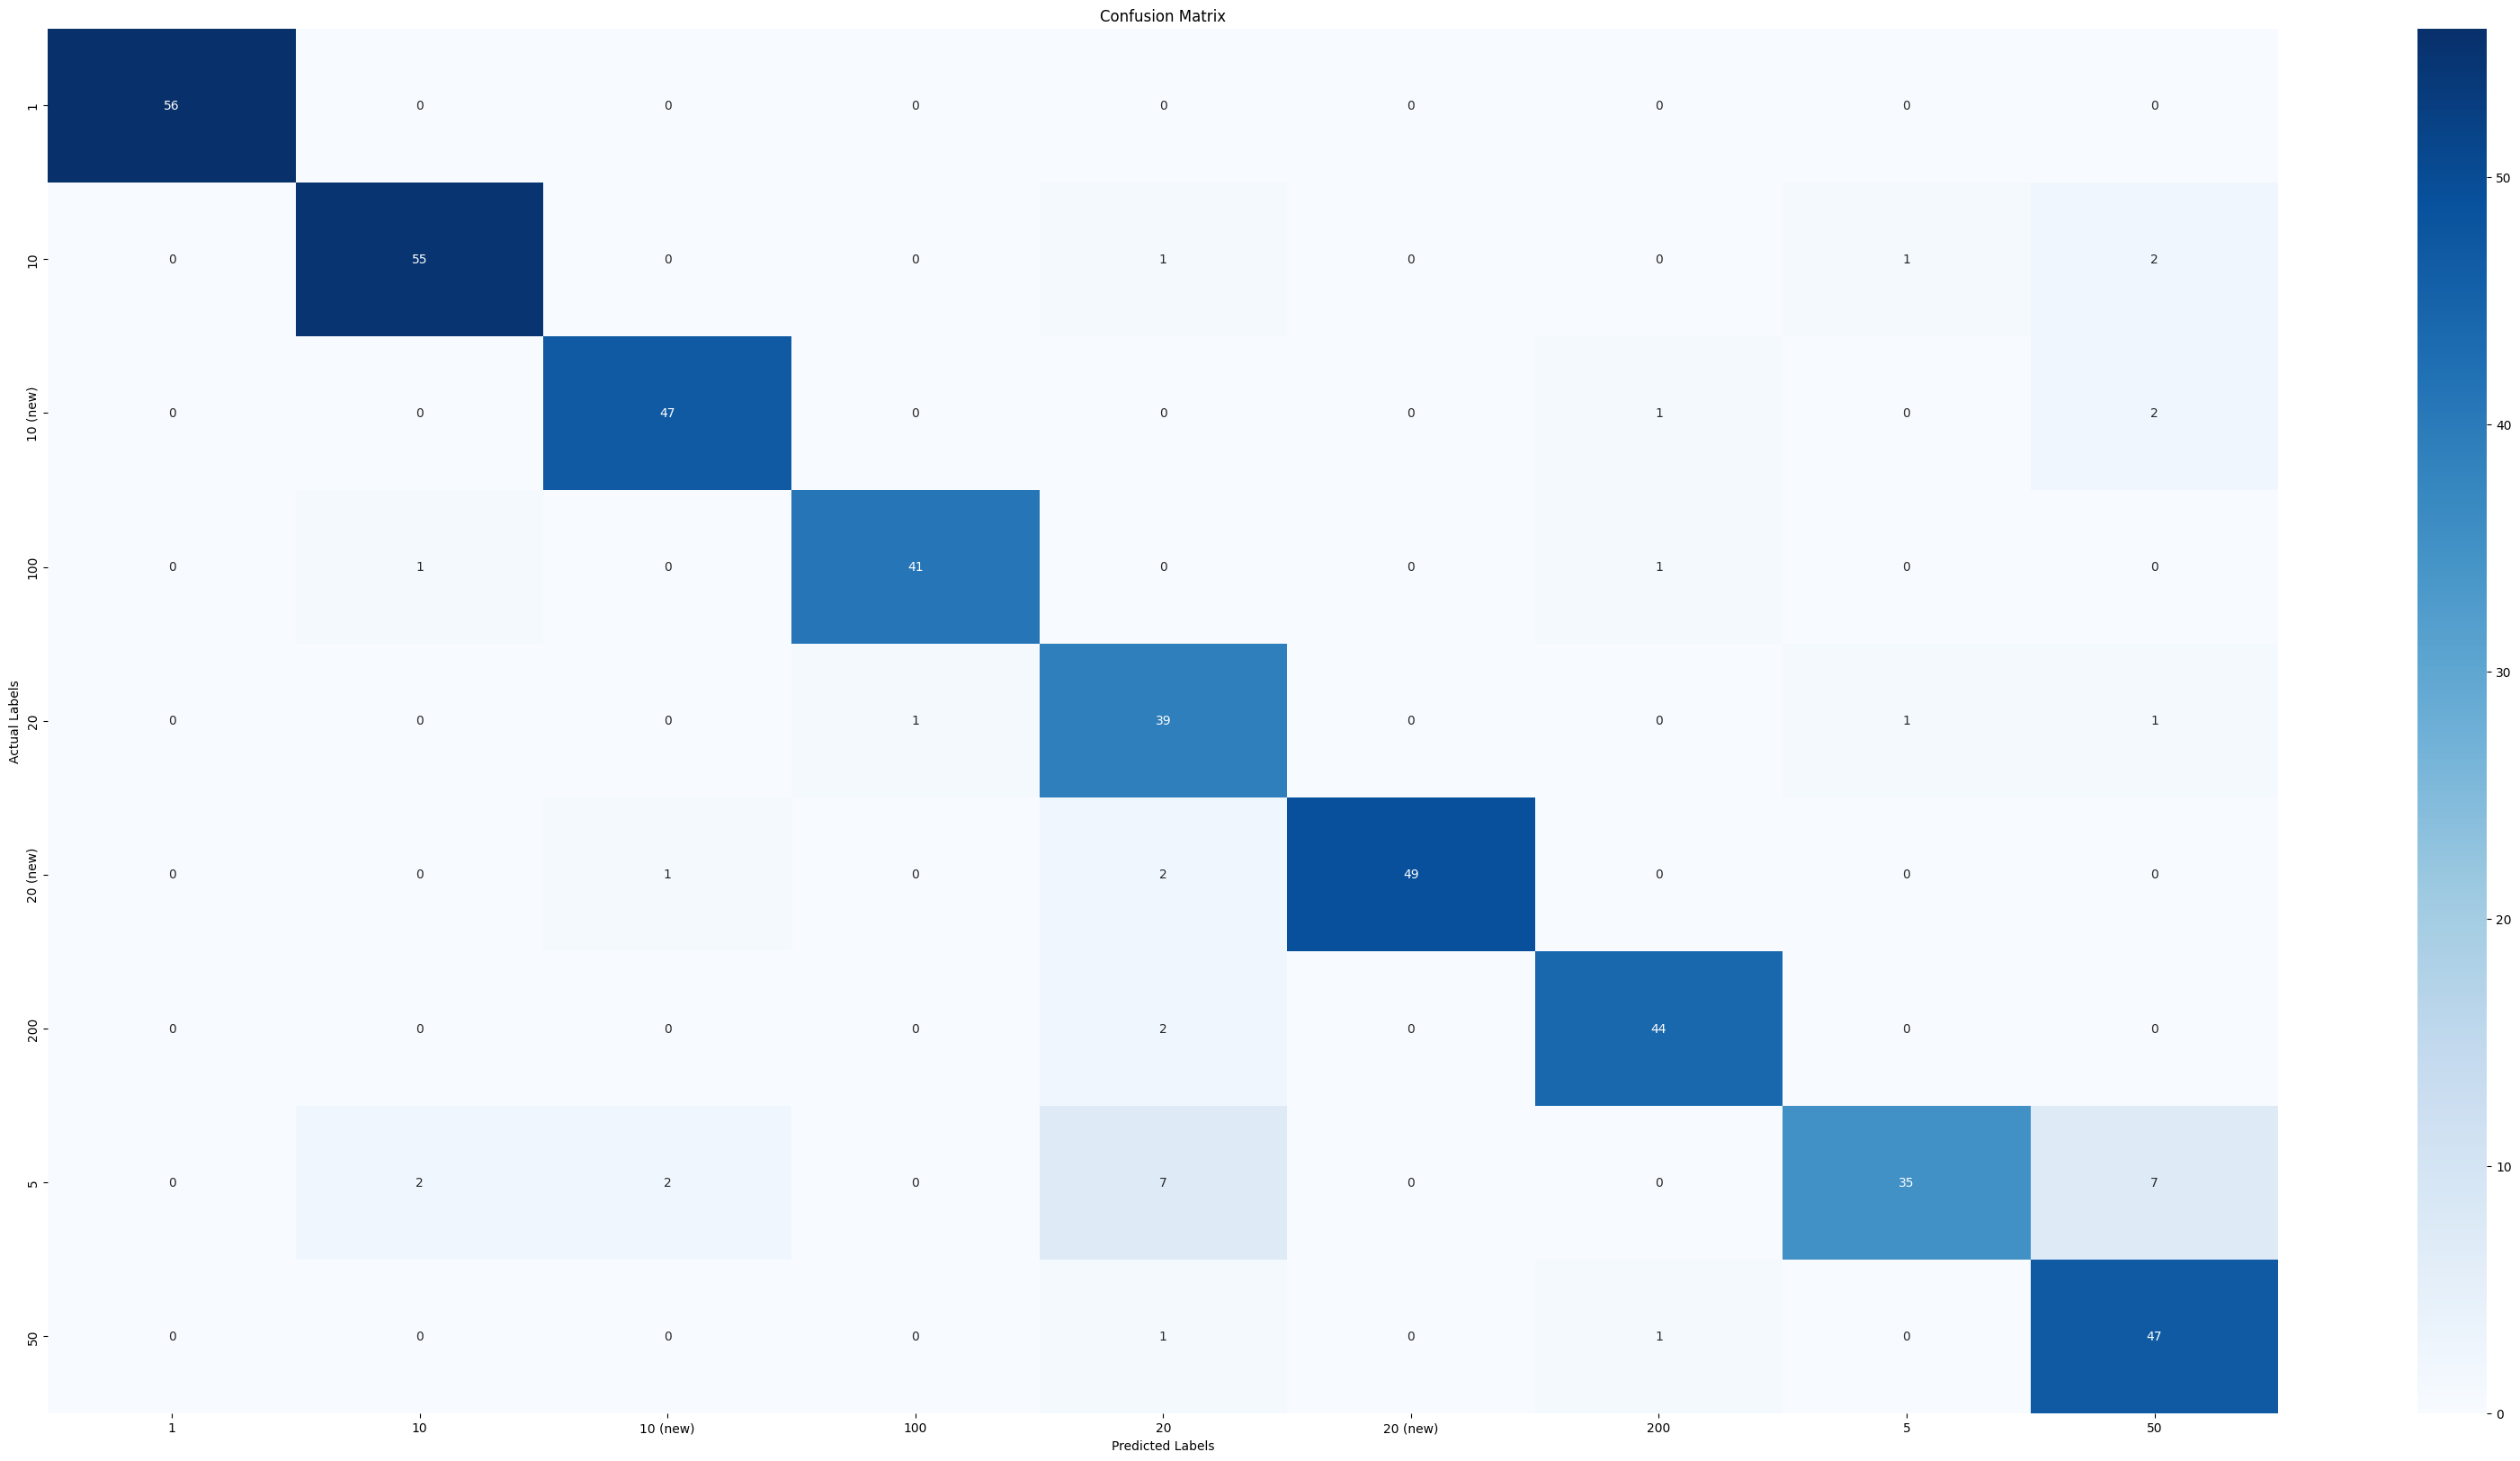

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
# Assuming `test_dataloader` is used for testing
actual_labels = []
predicted_labels = []

# Ensure model is in evaluation mode
resnet_model.eval()
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass to get predictions
        outputs = resnet_model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Append the true labels and predicted labels
        actual_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(actual_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(actual_labels, predicted_labels, average='weighted', zero_division=0)

# Print metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Precision: {precision * 100:.2f}%")
print(f"Model Recall: {recall * 100:.2f}%")
print(f"Model F1 Score: {f1 * 100:.2f}%")

# Print classification report
print(classification_report(actual_labels, predicted_labels, zero_division=0))

# Generate and visualize confusion matrix
# Generate and visualize confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# If 'test_dataloader' is a subset, use 'test_dataloader.dataset' to get the full dataset
class_names = test_dataloader.dataset.dataset.classes  # Accessing the full dataset for classes

plt.figure(figsize=(40, 20))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()



In [ ]:
# save model
torch.save(best_model_wts,"model.pth")



In [ ]:
# Assuming resnet_model is your model instance
resnet_model.load_state_dict(torch.load('model.pth')) # Load the state dict into the model
resnet_model.eval() # Set the model to evaluation mode
resnet_model.to(device) # Move the model to the device (GPU if available)

C:\Users\amrkh\AppData\Local\Temp\ipykernel_5100\1125438725.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load('model.pth')) # Load 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## check on test dataset

In [ ]:
correct_count, all_count = 0,0
# data_test is a PosixPath object and is not iterable,
# it needs to be changed to test_dataloader
for images, labels in test_dataloader:
    for i in range(len(labels)):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        img = images[i].unsqueeze(0)
        with torch.no_grad():
            # the variable model is undefined, likely it should be resnet_model
            logps = resnet_model(img)

        ps = torch.exp(logps)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number of images Tested=", all_count)
print("\n Model Accuracy=",(correct_count/all_count)*100)

Number of images Tested= 450

 Model Accuracy= 92.88888888888889


In [ ]:
transform_tests = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[-0.0932, -0.0971, -0.1260], std=[0.5091, 0.4912, 0.4931])  # Normalize the image
])


In [ ]:
def pred_class(img):
    # transform images
    img_tens = transform_tests(img) # transform_tests is now defined
    img_im = img_tens.unsqueeze(0).cuda()
    #uinput = Variable(img_im) # use Variable
    uinput = img_im.to(device)
    # model was undefined, it likely should be resnet_model
    out = resnet_model(uinput)
    # convert image to numpy format in cpu and snatching max prediction score class index
    index = out.data.cpu().numpy().argmax()
    return index

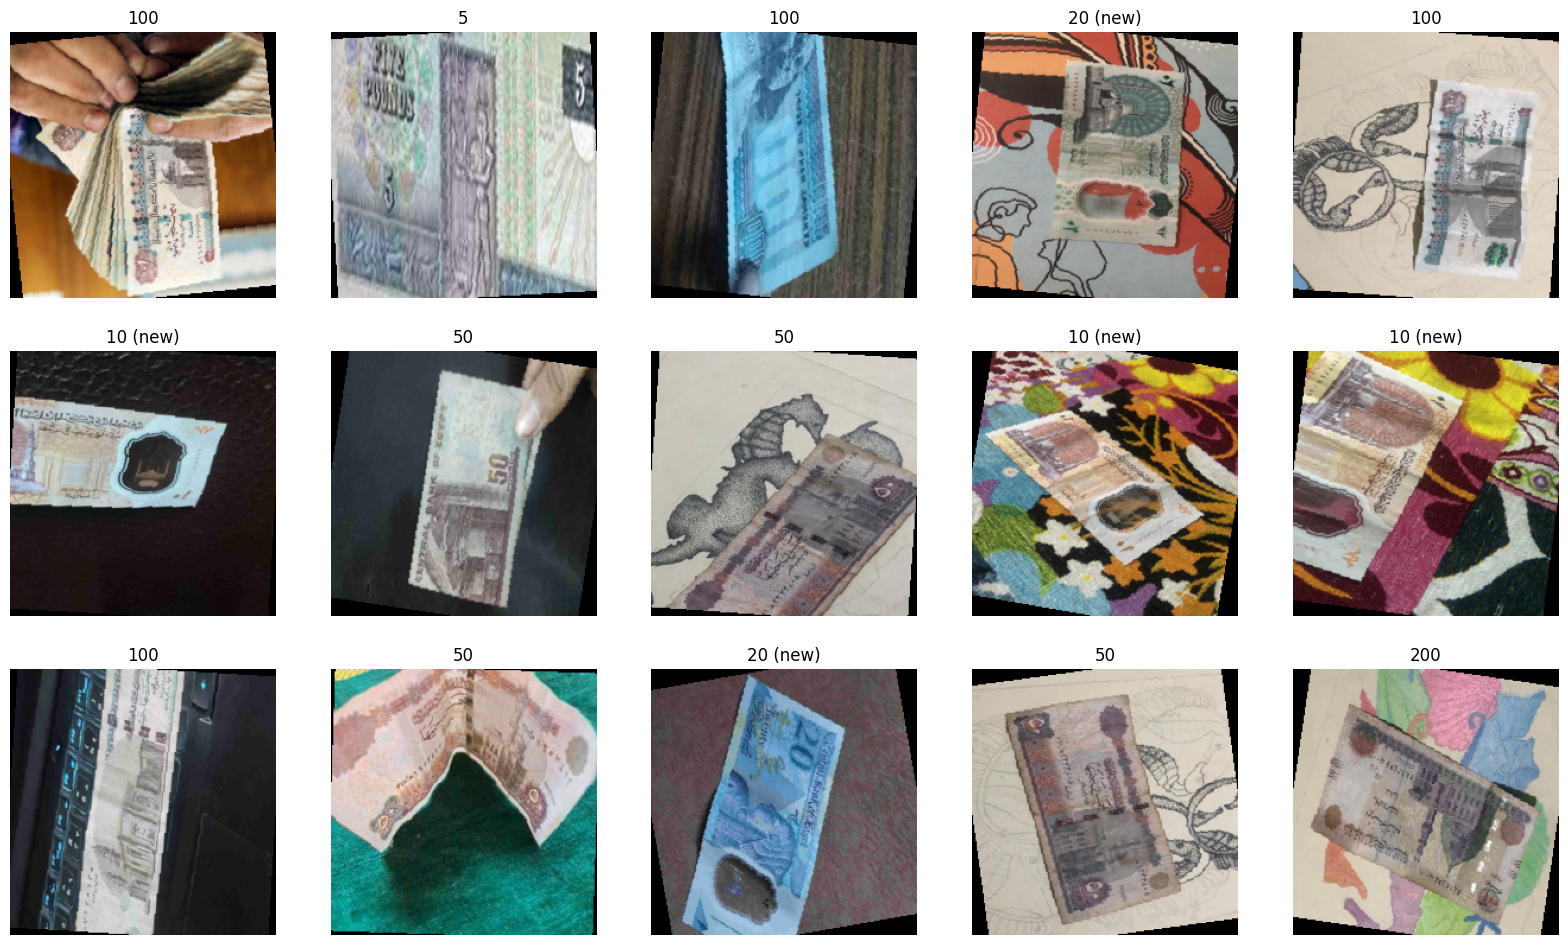

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

classes = {k: v for k, v in enumerate(sorted(class_names))} # Replace outcomes with class_names
resnet_model.eval()

plt.figure(figsize=(20,20))

for i, (images, labels) in enumerate(test_dataloader):
    # just want 25 images to print
    if i >30:
        break

    # Convert the image tensor to a PIL Image
    image = images[0]  # Get the first image from the batch
    image = image.cpu()  # Move to CPU if necessary

    # Denormalize the image
    # Assuming you normalized with mean=[-0.0932, -0.0971, -0.1260] and std=[0.5091, 0.4912, 0.4931]
    mean = torch.tensor([-0.0932, -0.0971, -0.1260])
    std = torch.tensor([0.5091, 0.4912, 0.4931])
    image = image * std[:, None, None] + mean[:, None, None]

    # Convert to PIL Image and display
    image = torchvision.transforms.ToPILImage()(image)

    # Make prediction
    index = pred_class(image)
    plt.subplot(5, 5, i + 1)
    plt.title(classes[index])
    plt.axis('off')
    plt.imshow(image)

C:\Users\amrkh\anaconda3\envs\cuda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\amrkh\anaconda3\envs\cuda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\amrkh\AppData\Local\Temp\ipykernel_12200\3176358120.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights

Enter the image URL to test the model:  https://upload.wikimedia.org/wikipedia/ar/1/12/EGP_100_Pounds_1994_%28Front%29.jpg


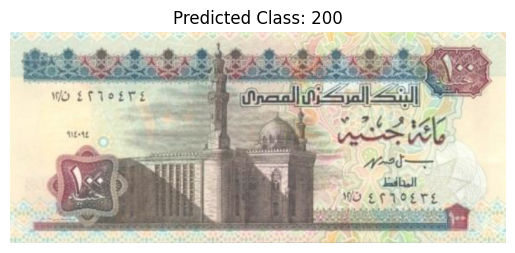

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the ResNet50 model from torchvision
model = models.resnet50(pretrained=False, num_classes=9)  # Make sure the number of classes is 9
model.load_state_dict(torch.load('model.pth'))  # Load the weights from the file
model.eval()  # Set the model to evaluation mode

# List of class names (Make sure to use the correct class names here)
class_names = [
    '1', '10', '10 (new)', '100', '20',
    '20 (new)', '200', '5', '50'
]

# Define the necessary transformations for prediction (without random transformations)
predict_transforms = transforms.Compose([
    transforms.Resize(256),  # Or use (224, 224) if it fits the model
    transforms.CenterCrop(224),  # Crop the image to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[-0.0932, -0.0971, -0.1260], std=[0.5091, 0.4912, 0.4931])  # Same values used during training
])

# Function to load the image from the URL
def predict_image(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Apply the fixed transformations to the image
    img_tensor = predict_transforms(img).unsqueeze(0)  # Add an extra dimension to make it [batch_size, C, H, W]

    # Predict the class using the model
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted_class = torch.max(output, 1)

    # Return the class name instead of the number
    predicted_class_name = class_names[predicted_class.item()]

    return img, predicted_class_name

# Part to allow the user to enter the image URL
def get_image_url_from_user():
    image_url = input("Enter the image URL to test the model: ")
    return image_url

# Ask for the URL from the user or use a fixed URL
image_url = get_image_url_from_user()

# Predict the image using the entered URL
img, predicted_class = predict_image(image_url)

# Display the image with the class name above it
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')  # Hide the axes
plt.show()
